<a href="https://colab.research.google.com/github/thilankam/PyTorch_Tutorials/blob/main/Regression_with_Neeural_Network_Pytorch_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Design model inputs and outputs
2. Construct the Loss and Optimizer
3. Training Loop:
  - forward pass: compute prediction
  - backward pass: gradients
  - update weights

We will use the Pytorch Neural Network Model

In [5]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


In [12]:
# 0. Prepare our data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

# reshape the y, because we want to make it a column vector
y = y.view(y.shape[0],1)

n_samples, n_features = X.shape

In [14]:
# 1. Design the model
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

In [15]:
# 2. Loss and Optimizer

leaarning_rate = 0.01
criterion = nn.MSELoss() # Mean Squared Error # Loss
optimizer = torch.optim.SGD(model.parameters(), lr = leaarning_rate)


epoch: 10, loss: 4471.1387
epoch: 20, loss: 3331.8972
epoch: 30, loss: 2508.3188
epoch: 40, loss: 1912.2649
epoch: 50, loss: 1480.4279
epoch: 60, loss: 1167.2595
epoch: 70, loss: 939.9467
epoch: 80, loss: 774.8149
epoch: 90, loss: 654.7635
epoch: 100, loss: 567.4246


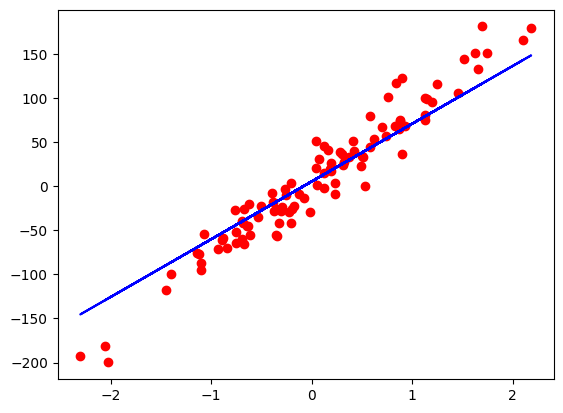

In [16]:
# 3. Training Loop
num_epocs = 100 # 100 training iterations
for epoch in range(num_epocs):
  # forward pass and loss
  y_prdicted = model(X)
  loss = criterion(y_prdicted, y)

  # backward pass . # calculate the gradient
  loss.backward() # this will do the backpropagation and it will calcuate the gradients

  # update
  optimizer.step()
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss: {loss.item():.4f}')


# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

